In [1]:
# Practice Goal: 1) Analyze daily purchase distributions 2) Get the mean and other descriptive statistics 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# import the data 

df = pd.read_csv("Downloads/orders_autumn_2020.csv")

In [4]:
# Dataframe digestion: Understand the columns and the data types. 


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TIMESTAMP                                             18706 non-null  object 
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64  
 2   ITEM_COUNT                                            18706 non-null  int64  
 3   USER_LAT                                              18706 non-null  float64
 4   USER_LONG                                             18706 non-null  float64
 5   VENUE_LAT                                             18706 non-null  float64
 6   VENUE_LONG                                            18706 non-null  float64
 7   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64  
 8   ACTUAL_DELIVERY_MINUTES                               18

In [5]:
# Data cleaning
# Drop the weather related columns (except precipitation) as it's not relevant for my analysis

df.drop(["CLOUD_COVERAGE"], axis=1, inplace = True)

In [6]:
df.drop(["TEMPERATURE","WIND_SPEED"], axis=1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TIMESTAMP                                             18706 non-null  object 
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64  
 2   ITEM_COUNT                                            18706 non-null  int64  
 3   USER_LAT                                              18706 non-null  float64
 4   USER_LONG                                             18706 non-null  float64
 5   VENUE_LAT                                             18706 non-null  float64
 6   VENUE_LONG                                            18706 non-null  float64
 7   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64  
 8   ACTUAL_DELIVERY_MINUTES                               18

In [8]:
# Subgoal: to change TIMESTAMP data type to datetime
# Split TIMESTAMP columns into DATE and TIME, given I want DATE information for the distribution. 

df[["DATE","TIME"]] = df["TIMESTAMP"].str.split(" ", expand = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TIMESTAMP                                             18706 non-null  object 
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64  
 2   ITEM_COUNT                                            18706 non-null  int64  
 3   USER_LAT                                              18706 non-null  float64
 4   USER_LONG                                             18706 non-null  float64
 5   VENUE_LAT                                             18706 non-null  float64
 6   VENUE_LONG                                            18706 non-null  float64
 7   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64  
 8   ACTUAL_DELIVERY_MINUTES                               18

In [10]:
df.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,PRECIPITATION,DATE,TIME
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,2020-08-01,06:07:00.000
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,2020-08-01,06:17:00.000
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,2020-08-01,06:54:00.000
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,2020-08-01,07:09:00.000
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,2020-08-01,07:10:00.000


In [11]:
df[["TIME","DATE"]] = df[["TIME", "DATE"]].apply(pd.to_datetime, errors = 'coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   TIMESTAMP                                             18706 non-null  object        
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64         
 2   ITEM_COUNT                                            18706 non-null  int64         
 3   USER_LAT                                              18706 non-null  float64       
 4   USER_LONG                                             18706 non-null  float64       
 5   VENUE_LAT                                             18706 non-null  float64       
 6   VENUE_LONG                                            18706 non-null  float64       
 7   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64 

In [13]:
# Create Hour column from TIME column 

df["HOUR"] = df["TIME"].dt.hour

In [14]:
df.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,PRECIPITATION,DATE,TIME,HOUR
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,2020-08-01,2024-02-12 06:07:00,6
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,2020-08-01,2024-02-12 06:17:00,6
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,2020-08-01,2024-02-12 06:54:00,6
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,2020-08-01,2024-02-12 07:09:00,7
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,2020-08-01,2024-02-12 07:10:00,7


In [15]:
df.head(30)

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,PRECIPITATION,DATE,TIME,HOUR
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,2020-08-01,2024-02-12 06:07:00,6
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,2020-08-01,2024-02-12 06:17:00,6
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,2020-08-01,2024-02-12 06:54:00,6
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,2020-08-01,2024-02-12 07:09:00,7
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,2020-08-01,2024-02-12 07:10:00,7
5,2020-08-01 07:20:00.000,-3,2,60.173,24.953,60.178,24.949,18,15,0.0,2020-08-01,2024-02-12 07:20:00,7
6,2020-08-01 07:33:00.000,11,2,60.188,24.956,60.178,24.949,24,35,0.0,2020-08-01,2024-02-12 07:33:00,7
7,2020-08-01 07:44:00.000,1,2,60.199,24.957,60.198,24.932,31,32,0.0,2020-08-01,2024-02-12 07:44:00,7
8,2020-08-01 07:59:00.000,0,1,60.182,24.955,60.178,24.949,24,24,0.0,2020-08-01,2024-02-12 07:59:00,7
9,2020-08-01 08:06:00.000,6,4,60.189,24.964,60.165,24.929,36,42,0.0,2020-08-01,2024-02-12 08:06:00,8


In [64]:
#EDA (Exploratory Data Analysis)

# Use groupby to get daily purchase count per day. 

count_df = df.groupby("DATE").size() ###is this not a dataframe? is this imaginary series? 
print(count_df)

DATE
2020-08-01    299
2020-08-02    328
2020-08-03    226
2020-08-04    228
2020-08-05    256
             ... 
2020-09-26    364
2020-09-27    386
2020-09-28    284
2020-09-29    260
2020-09-30    342
Length: 61, dtype: int64


In [69]:
count_df = df.groupby("DATE").size().reset_index(name='count')

In [70]:
print(count_df)

         DATE  count
0  2020-08-01    299
1  2020-08-02    328
2  2020-08-03    226
3  2020-08-04    228
4  2020-08-05    256
..        ...    ...
56 2020-09-26    364
57 2020-09-27    386
58 2020-09-28    284
59 2020-09-29    260
60 2020-09-30    342

[61 rows x 2 columns]


(array([18475., 18482., 18489., 18496., 18506., 18513., 18520., 18527.,
        18536.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

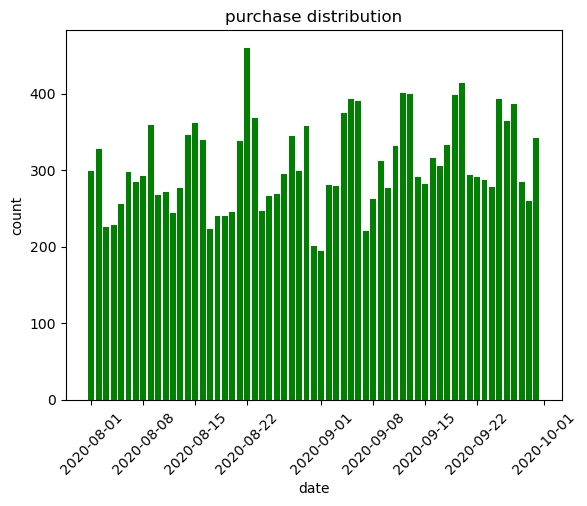

In [74]:
#EDA (Exploratory Data Analysis) - visualization
# Use plot Bar to visualize daily purchase distribution

plt.bar(count_df["DATE"], count_df["count"], color = "green")
plt.xlabel("date")
plt.ylabel("count")
plt.title("Daily Purchase Distribution")
plt.xticks(rotation=45)

In [78]:
# Get the descriptive statistics of the count_df 

count_df.describe()

,count
count,61.000000
mean,306.655738
std,58.949381
min,194.000000
25%,267.000000
50%,294.000000
75%,346.000000
max,460.000000


In [77]:
#average purchase count

avg_count = count_df["count"].mean()
print(avg_count)

306.655737704918


In [ ]:
# Practice Goal: 2) Analyze the trend between day of the week and purchases
# Sub goal: 1) Get the day of the week data per date 

In [19]:
# extract day from "DATE" Column

# Extract "DAY" as a variable to see my code is correct.

DAY = df["DATE"].dt.weekday
print(Day)

0        5
1        5
2        5
3        5
4        5
        ..
18701    2
18702    2
18703    2
18704    2
18705    2
Name: DATE, Length: 18706, dtype: int64


In [22]:
# create "DAY" column on dataframe 

df["DAY"] = df["DATE"].dt.weekday

In [21]:
# check if the data is correctly extracted. 
# Monday = 0, Sunday = 6

df.head(20)

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,PRECIPITATION,DATE,TIME,HOUR,DAY
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,2020-08-01,2024-02-12 06:07:00,6,5
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,2020-08-01,2024-02-12 06:17:00,6,5
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,2020-08-01,2024-02-12 06:54:00,6,5
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,2020-08-01,2024-02-12 07:09:00,7,5
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,2020-08-01,2024-02-12 07:10:00,7,5
5,2020-08-01 07:20:00.000,-3,2,60.173,24.953,60.178,24.949,18,15,0.0,2020-08-01,2024-02-12 07:20:00,7,5
6,2020-08-01 07:33:00.000,11,2,60.188,24.956,60.178,24.949,24,35,0.0,2020-08-01,2024-02-12 07:33:00,7,5
7,2020-08-01 07:44:00.000,1,2,60.199,24.957,60.198,24.932,31,32,0.0,2020-08-01,2024-02-12 07:44:00,7,5
8,2020-08-01 07:59:00.000,0,1,60.182,24.955,60.178,24.949,24,24,0.0,2020-08-01,2024-02-12 07:59:00,7,5
9,2020-08-01 08:06:00.000,6,4,60.189,24.964,60.165,24.929,36,42,0.0,2020-08-01,2024-02-12 08:06:00,8,5


In [25]:
count_df = df.groupby("DATE").size()
print(count_df)


DATE
2020-08-01    299
2020-08-02    328
2020-08-03    226
2020-08-04    228
2020-08-05    256
             ... 
2020-09-26    364
2020-09-27    386
2020-09-28    284
2020-09-29    260
2020-09-30    342
Length: 61, dtype: int64


In [29]:
# Approach 1: Create separate dataframe and use the values

# 1) Double check my query is correct

count_df = df.groupby("HOUR").size()
print(count_df)

# 2) Create df2 for purchases count per hour of the day

df2 = df.groupby("HOUR").size().reset_index(name = "purchase count")

HOUR
4        3
5       78
6      198
7      610
8     1521
9     1593
10    1487
11    1337
12    1292
13    1580
14    1946
15    2125
16    1912
17    1525
18     918
19     419
20      85
21      72
22       5
dtype: int64


In [31]:
# Check df2 

df2.info()
print(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   HOUR            19 non-null     int64
 1   purchase count  19 non-null     int64
dtypes: int64(2)
memory usage: 432.0 bytes
    HOUR  purchase count
0      4               3
1      5              78
2      6             198
3      7             610
4      8            1521
5      9            1593
6     10            1487
7     11            1337
8     12            1292
9     13            1580
10    14            1946
11    15            2125
12    16            1912
13    17            1525
14    18             918
15    19             419
16    20              85
17    21              72
18    22               5


Text(0.5, 1.0, 'Hour of the day purchase trend')

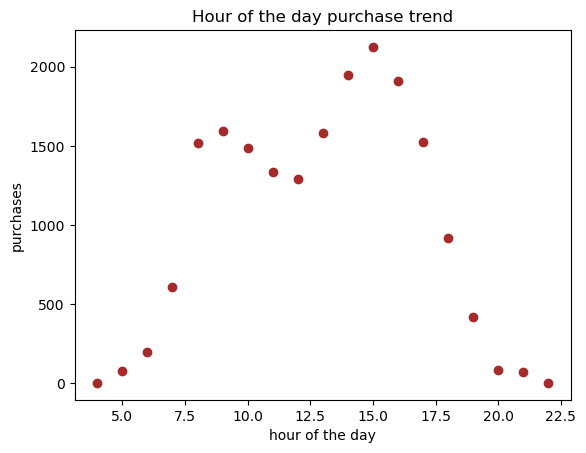

In [36]:
# visualization between Hour and purchase count 
# 1)Scatter plot

plt.scatter(x=df2["HOUR"], y=df2["purchase count"], color = "brown")
plt.xlabel("hour of the day")
plt.ylabel("purchases")
plt.title("Hour of the day purchase trend")

In [39]:
grouped_data = df.groupby("HOUR").size()

Text(0.5, 1.0, 'correlation between hour of the day and purchases')

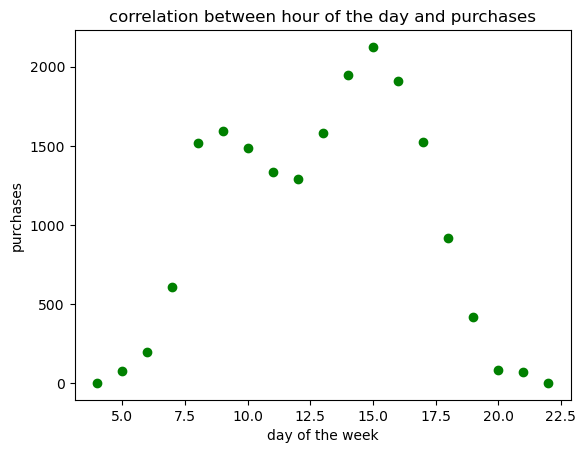

In [43]:
# Scatter plot to analyze the correlation
# Q. Create to seperate dataframe and add into one analysis? e.g. df1 for all tables, df2 for only date and purchase count?
# Approach 2 - creating seperate variables and use them for visualization

plt.scatter(x=grouped_data.index, y=grouped_data.values, color = "green")
plt.xlabel("day of the week")
plt.ylabel("purchases")
plt.title("correlation between hour of the day and purchases")

# Conclusion - Apprach 1 and 2 showed the same result. 


Text(0.5, 1.0, 'purchase count per day')

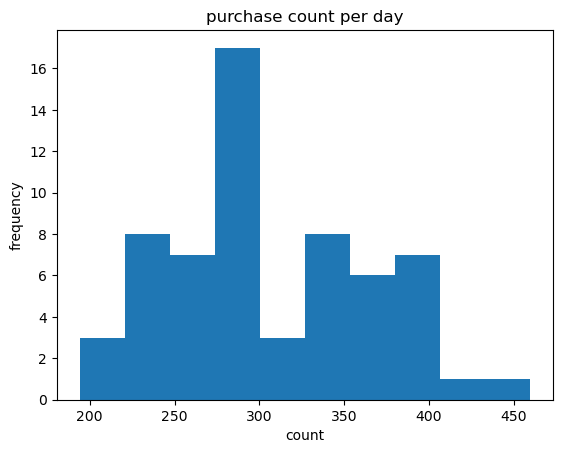

In [67]:
plt.hist(count_df)
plt.xlabel("count")
plt.ylabel("frequency")
plt.title("purchase count per day")